相関係数0.889:


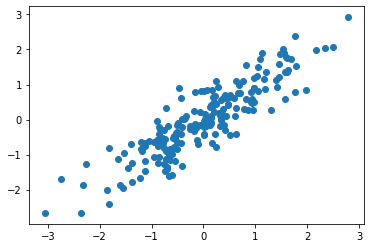

In [62]:
#AI-TECHGYM-1-5-A-1
#教師なし学習 PCA

# データ加工・処理・分析ライブラリ
import numpy as np
import scipy as sp

# 可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

# インポート
from sklearn.preprocessing import StandardScaler

#サンプルデータ
X = np.array(
[[-6.253e-01, -1.701e-01],
 [ 9.607e-01,  5.909e-01],
 [-5.985e-01, -4.026e-01],
 [-2.228e+00, -5.326e-01],
 [-4.614e-01, -4.989e-01],
 [-9.589e-01, -2.693e-01],
 [-6.731e-01, -3.383e-01],
 [ 1.305e+00,  5.914e-01],
 [ 3.745e-01, -9.854e-02],
 [-1.826e+00, -4.062e-01],
 [ 6.683e-01,  3.369e-01],
 [-5.826e-01, -1.774e-01],
 [-4.181e-01, -3.738e-01],
 [ 1.722e-01,  2.647e-01],
 [ 3.771e-01,  1.884e-01],
 [-6.794e-01, -1.316e-01],
 [ 1.031e+00,  4.256e-01],
 [ 3.360e-01,  3.910e-02],
 [ 7.057e-01,  4.887e-01],
 [ 8.395e-01,  1.521e-01],
 [ 1.499e+00,  4.714e-01],
 [ 2.884e-01,  3.313e-02],
 [-5.029e-01, -3.687e-01],
 [ 1.479e+00,  7.404e-01],
 [-4.444e-01, -1.650e-01],
 [-5.335e-01, -6.022e-02],
 [-6.162e-01, -2.118e-01],
 [ 7.466e-02, -6.143e-02],
 [-1.136e-01,  7.329e-02],
 [-2.007e-02,  6.097e-02],
 [ 1.896e-01,  1.998e-01],
 [ 9.385e-01,  5.417e-01],
 [-3.667e-01, -3.650e-02],
 [-8.935e-01, -3.728e-01],
 [-1.318e+00, -3.576e-01],
 [-3.818e-01, -2.013e-01],
 [-5.138e-01, -5.060e-01],
 [ 9.037e-01,  2.495e-01],
 [-4.389e-01, -1.506e-01],
 [-5.942e-01, -9.412e-02],
 [-3.129e-01, -6.573e-04],
 [-3.002e-01, -4.221e-01],
 [-5.992e-01, -2.604e-01],
 [ 2.204e-01,  2.039e-01],
 [ 5.252e-01,  1.870e-01],
 [ 5.566e-01, -1.337e-01],
 [ 1.354e+00,  5.474e-01],
 [-6.832e-01, -3.947e-01],
 [-1.233e-01, -1.043e-01],
 [-3.132e-01, -6.983e-02],
 [-2.488e+00, -8.446e-01],
 [ 1.250e+00,  5.857e-01],
 [ 1.768e-01,  1.107e-01],
 [-5.078e-01, -3.157e-01],
 [ 1.827e+00,  6.202e-01],
 [ 8.102e-01,  1.772e-01],
 [ 4.285e-01,  1.299e-01],
 [-6.811e-02, -1.834e-01],
 [-2.381e-01,  3.203e-02],
 [-5.765e-01, -4.611e-01],
 [ 7.866e-01,  2.404e-01],
 [-3.940e-01, -1.132e-01],
 [ 3.003e-01,  4.058e-02],
 [ 8.344e-01,  3.634e-01],
 [ 6.770e-01,  8.622e-02],
 [ 8.229e-01,  7.953e-02],
 [ 1.111e+00,  8.384e-02],
 [-1.111e+00, -2.219e-01],
 [-3.256e-05,  2.526e-01],
 [ 9.013e-01,  4.666e-01],
 [ 6.133e-01,  2.294e-01],
 [ 1.003e+00,  2.676e-01],
 [-5.003e-01, -2.652e-01],
 [-1.468e+00, -2.626e-01],
 [-1.166e+00, -4.357e-01],
 [ 1.233e+00,  3.726e-01],
 [-8.714e-02, -7.682e-02],
 [ 1.326e+00,  4.233e-01],
 [-6.559e-01, -2.364e-01],
 [-3.989e-01, -1.323e-01],
 [ 1.465e-01,  2.887e-02],
 [ 8.347e-01,  2.786e-01],
 [ 1.265e-01,  1.839e-02],
 [ 2.017e-01,  6.384e-02],
 [-2.678e-01,  4.920e-03],
 [ 2.851e-01,  5.361e-02],
 [-7.534e-01, -3.375e-01],
 [ 5.293e-01,  2.460e-02],
 [ 3.656e-01, -5.627e-02],
 [ 3.628e-02, -1.716e-02],
 [ 1.981e-01,  1.488e-01],
 [-7.567e-01, -2.059e-01],
 [ 1.157e-01, -2.550e-02],
 [-1.819e-01, -8.989e-02],
 [ 1.572e-01,  1.261e-01],
 [ 5.835e-01,  2.373e-01],
 [-9.468e-01, -2.889e-01],
 [ 7.131e-01,  1.772e-01],
 [ 1.302e+00,  6.245e-01],
 [-5.491e-01, -4.446e-01],
 [-4.297e-01, -2.509e-01],
 [-3.868e-01, -2.662e-01],
 [-6.576e-01, -8.451e-02],
 [ 1.240e+00,  4.907e-01],
 [ 3.184e-01,  4.122e-03],
 [-8.981e-01, -2.101e-01],
 [ 3.369e-01,  1.880e-01],
 [-4.185e-01, -1.813e-01],
 [ 2.366e-01,  3.395e-01],
 [ 3.513e-01,  9.233e-02],
 [ 1.353e+00,  4.200e-01],
 [-8.348e-01, -2.000e-01],
 [ 2.329e+00,  9.164e-01],
 [ 4.672e-02,  2.491e-01],
 [ 4.554e-01,  1.979e-01],
 [-7.107e-01, -1.566e-02],
 [-5.501e-02, -2.192e-01],
 [-4.546e-01, -2.623e-01],
 [-1.082e-01, -4.111e-02],
 [-8.976e-01, -2.411e-01],
 [ 7.348e-01,  8.561e-02],
 [ 2.253e-01, -2.495e-01],
 [-3.274e-01,  1.876e-01],
 [ 1.204e+00,  2.892e-01],
 [ 1.703e-01, -2.132e-01],
 [ 1.000e+00,  3.606e-01],
 [-6.715e-01, -7.207e-02],
 [ 1.192e+00,  3.494e-01],
 [ 2.402e-01,  1.325e-01],
 [ 5.566e-01,  3.392e-01],
 [-1.231e+00, -3.016e-01],
 [ 1.527e-01, -3.222e-02],
 [ 1.376e+00,  4.389e-01],
 [-7.052e-01, -1.869e-01],
 [-1.250e+00, -6.159e-01],
 [-1.877e+00, -5.874e-01],
 [-1.471e+00, -7.577e-01],
 [-1.503e+00, -6.392e-01],
 [-3.743e-01, -1.245e-01],
 [ 8.785e-01,  3.865e-01],
 [ 4.380e-02, -1.336e-01],
 [ 5.460e-01,  9.790e-02],
 [ 1.416e-01, -3.319e-02],
 [ 6.358e-02,  2.600e-03],
 [-8.870e-02, -5.084e-02],
 [ 1.324e-01, -5.259e-02],
 [ 4.291e-01,  1.395e-01],
 [-5.625e-01, -3.555e-01],
 [ 5.983e-01,  3.054e-01],
 [-3.527e-01,  2.779e-01],
 [ 2.927e-01, -5.885e-02],
 [ 1.492e+00,  2.437e-01],
 [-3.211e-01, -2.120e-01],
 [-4.287e-01, -1.624e-01],
 [ 5.566e-02,  4.723e-02],
 [-1.867e-01, -5.752e-02],
 [-3.160e-01, -1.357e-01],
 [-9.523e-01, -2.034e-01],
 [-6.172e-01, -1.686e-01],
 [ 2.607e-01,  2.838e-01],
 [-1.296e+00, -5.875e-01],
 [ 1.302e-01,  1.065e-01],
 [ 3.620e-02, -7.143e-02],
 [ 4.514e-01,  2.200e-01],
 [ 7.823e-01,  1.558e-01],
 [-1.915e+00, -8.412e-01],
 [ 1.335e+00,  1.770e-01],
 [-5.572e-01,  9.782e-02],
 [-2.540e-01,  6.536e-03],
 [ 3.834e-02, -1.416e-01],
 [ 1.669e+00,  2.583e-01],
 [-4.012e-01, -1.249e-01],
 [ 1.340e+00,  5.547e-01],
 [ 3.122e-01,  1.706e-01],
 [ 2.095e+00,  6.465e-01],
 [-6.857e-01, -2.375e-01],
 [-9.812e-01, -5.308e-01],
 [ 3.815e-01,  2.161e-01],
 [ 8.354e-02,  2.577e-01],
 [ 1.562e-01,  1.073e-02],
 [-8.986e-01, -4.652e-01],
 [ 2.167e-01, -1.353e-01],
 [ 3.991e-01,  1.868e-01],
 [-3.901e-01, -5.575e-02],
 [ 1.511e-01, -3.500e-02],
 [-2.599e-02, -5.302e-02],
 [-5.557e-01, -2.823e-01],
 [-4.144e-01, -1.612e-01],
 [-5.437e-01, -4.312e-01],
 [ 1.428e+00,  5.346e-01],
 [ 4.519e-01, -1.435e-01],
 [ 8.074e-01,  1.445e-01],
 [-4.613e-01, -3.089e-01],
 [-1.064e-01,  2.400e-01],
 [-1.098e+00, -5.662e-01],
 [ 8.384e-01,  2.784e-01],
 [ 3.127e-01, -1.060e-02],
 [ 1.956e+00,  6.382e-01],
 [-1.108e+00, -3.951e-01],
 [ 3.986e-01,  2.319e-02]])

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
p = sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]
print('相関係数{:.3f}:'.format(p))
plt.scatter(X_std[:, 0], X_std[:, 1])


In [57]:
X[:,1].max()

0.9164

In [33]:
word = "bear"
word == "熊"

False

In [44]:
#AI-TECHGYM-1-11-Q-1
#自然言語処理

#実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#インポート
import urllib.request
import zipfile

# ファイル整形
import re

#ファイルダウンロード
url = 'https://www.aozora.gr.jp/cards/001847/files/57347_ruby_57225.zip'
zip = '57347_ruby_57225.zip'
urllib.request.urlretrieve(url, zip)

# ダウンロードしたzipの解凍
with zipfile.ZipFile(zip, 'r') as myzip:
  myzip.extractall()
  # 解凍後のファイルからデータ読み込み
  for myfile in myzip.infolist():
    # 解凍後ファイル名取得
    filename = myfile.filename
    # ファイルオープン時にencodingを指定してsjisの変換をする
    with open(filename, encoding='sjis') as file:
      text = file.read()


re.findall('\n\n', text)

['\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n']

In [3]:
#1-10-(2)

import numpy as np
print('リスト linesの次元数、要素数 : 1, {}'.format(len(lines)))
print('リスト resultsの次元数、要素数 : 2, {}'.format(len(results)))

print('lines、resultsの外側の要素数は、元の文章の行数')

print('resultsの　行数 : 内側のリストの要素数')
for i, result in enumerate(results):
    print('{} : {}'.format(i+1, len(result)))

リスト linesの次元数、要素数 : 1, 18
リスト resultsの次元数、要素数 : 2, 18
lines、resultsの外側の要素数は、元の文章の行数
resultsの　行数 : 内側のリストの要素数
1 : 9
2 : 36
3 : 32
4 : 22
5 : 46
6 : 71
7 : 33
8 : 26
9 : 14
10 : 33
11 : 24
12 : 42
13 : 18
14 : 37
15 : 43
16 : 26
17 : 22
18 : 38


In [38]:
print(np.array(results))

[list(['月額', '2', '万', '円', 'の', '「', 'プログラミング', 'ライフ', '」'])
 list(['「', 'テック', 'ジム', '（', 'TechGYM', '）', '」', 'は', '、', 'どんな', 'テクノロジー', 'に', 'も', '即座', 'に', '対応', 'できる', '「', '自', '走', 'できる', 'エンジニア', '」', 'を', 'ゴール', 'に', 'し', 'た', '自習', '形式', 'の', 'プログラマー', '養成', '塾', 'です', '。'])
 list(['どんな', 'レベル', 'から', 'でも', '始め', 'られ', 'ます', 'ので', '、', '全く', 'の', 'プログラミング', '初心者', 'から', 'ベテラン', 'エンジニア', 'まで', '、', '各', '個人', 'の', 'スキル', 'レベル', 'に', 'あわせ', 'て', '学ぶ', 'こと', 'が', 'でき', 'ます', '。'])
 list(['なお', '、', '最速', 'で', 'プログラミング', 'スキル', 'の', '獲得', 'を', 'し', 'たい', '方', 'に', 'は', 'テック', 'ジム', 'の', 'カリキュラム', 'が', 'オススメ', 'です', '。'])
 list(['開催', '期間', 'に', 'あわせ', 'て', '、', '好き', 'な', '時間', 'に', '好き', 'な', 'だけ', '、', '何', '回', 'でも', '参加', 'する', 'こと', 'が', '可能', 'で', '、', '課題', 'を', '持ち帰る', 'こと', 'も', '可能', 'です', '。', '（', '提携', '校', 'により', '開催', '頻度', 'や', '開催', '時間', 'が', '違い', 'ます', '。', '）'])
 list(['自習', 'を', '見守る', 'トレーナー', 'は', '、', '経験', '豊富', 'な', '現役', 'プログラマー', 'です', '。', 'カリキュラム',

In [21]:
df_trans_sch = trans[trans.InvoiceNo.isin(trans_XY)]
df_trans_X = df_trans_sch[df_trans_sch.StockCode == '85123A']
df_trans_Y = df_trans_sch[df_trans_sch.StockCode == '47566']
df_trans_XY = pd.concat([df_trans_X, df_trans_Y], axis=0)
print(len(df_trans_XY))
df_trans_XY.sort_values('InvoiceDate')

568


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
20242,20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,5
20248,20248,538032,47566,PARTY BUNTING,5,2010-12-09 12:59:00,4.65,14479.0,United Kingdom,5
21474,21474,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom,5
21488,21488,538086,47566,PARTY BUNTING,1,2010-12-09 14:44:00,4.65,12872.0,United Kingdom,5
21578,21578,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain,5
21577,21577,538095,47566,PARTY BUNTING,1,2010-12-09 14:55:00,4.65,17097.0,Spain,5
27309,27309,538529,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2010-12-13 10:24:00,2.95,14290.0,United Kingdom,5
27321,27321,538529,47566,PARTY BUNTING,5,2010-12-13 10:24:00,4.65,14290.0,United Kingdom,5
29758,29758,538826,47566,PARTY BUNTING,1,2010-12-14 12:58:00,4.65,12370.0,Cyprus,5
29732,29732,538826,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-14 12:58:00,2.55,12370.0,Cyprus,5
